In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as pyplot
from matplotlib.collections import BrokenBarHCollection

In [2]:
#cleans up the raw data for the genes/telom/centrom file. Step 1 of cleaning
out = []
with open('../Data File(s): Genes and Regulation/saccharomyces_cerevisiae.20200811.gff.csv') as f:
    data = csv.reader(f)
    for line in data:
        lineclear = list(filter(None, line))
        if len(lineclear) > 2:
            out.append(line)

In [3]:
with open("../Intermediate Files/out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(out)

In [4]:
##Roman to csv
class Solution(object):
   def romanToInt(self, s):
      """
      :type s: str
      :rtype: int
      """
      roman = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000,'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
      i = 0
      num = 0
      while i < len(s):
         if i+1<len(s) and s[i:i+2] in roman:
            num+=roman[s[i:i+2]]
            i+=2
         else:
            #print(i)
            num+=roman[s[i]]
            i+=1
      return num
ob1 = Solution()

In [5]:
##Save centromere, telomere, gene total lengths (only dataset that has this info). Step 2 of pathway
a,b = 0,0
c,g,t,cent,comp = [],[],[],[], []
for i in range(0,16):
   c.append([])
   g.append([])
   t.append([])
   cent.append([])
   comp.append([])
with open("../Intermediate Files/out.csv") as f:
    data = csv.reader(f)
    for line in data:
        if line[0] != "chrmt":
            line[0] = ob1.romanToInt(line[0][3:])
            start = int(line[3])
            stop = int(line[4])
            width = stop-start
            if line[2] == "chromosome":
                c[line[0]-1].append((line[0],start,width))
            elif line[2] == "telomere":
                t[line[0]-1].append((line[0],start,width))
            elif line[2] == "centromere":
                cent[line[0]-1].append((line[0],start,width))
            elif line[2] == "gene":
                g[line[0]-1].append((start,width))
                a = a+1
            elif line[2].split("_")[-1] == "gene":
                g[line[0]-1].append((start,width))
                b = b+1
               

telclear = [list(set(item)) for item in t]
centclear = [list(set(item)) for item in cent]

            
print(len(c),len(telclear),len(centclear), a+b) #Number of chrom, telomere/chrom, centromere, total genes

16 16 16 7064


In [6]:
#Saving files
with open("../Intermediate Files/outputchrom.csv", "w") as f:
    writer = csv.writer(f)
    for item in c:
       writer.writerows(item)

with open("../Intermediate Files/outputtelom.csv", "w") as f:
    writer = csv.writer(f)
    for item in telclear:
       writer.writerows(item)

with open("../Intermediate Files/outputcentrom.csv", "w") as f:
    writer = csv.writer(f)
    for item in centclear:
       writer.writerows(item)

In [7]:
namech,name,g = [],[], []
a,b, c,d,e = 0,0, 0,0,0

for i in range(0,17):
   g.append([])

#cleans the names of the genes i.e removes genes from mitochondria, ones that have faulty id and/or genenames, the "("
#and ")" that have been replaced with "%28" and "%29" respectively. 
with open("../Intermediate Files/out.csv") as f:
    data = csv.reader(f)
    for line in data:
        start = int(line[3])
        stop = int(line[4])
        width = stop-start
        allitems = line[-1].split(";")
        if line[0] != "chrmt":
            line[0] = ob1.romanToInt(line[0][3:])
            if line[2] == "gene":
                c = c+1
                if allitems[2][:4].lower() == "gene":
                      g[line[0]-1].append((line[0],allitems[2][5:],start,width))
                      a = a+1
####                      name.append(item[5:])
                elif allitems[0][:2].lower() == "id":
####                      if allitems[1][5:] == item[3:]:
####                         e = e+1
####                         name.append(item[3:])
                      g[line[0]-1].append((line[0],allitems[0][3:],start,width))
                      a = a+1
####                      name.append(item[3:])
            elif line[2].split("_")[-1] == "gene":
                b = b+1
                if allitems[2][:4].lower() == "gene":
                      g[line[0]-1].append((line[0],allitems[2][5:],start,width))
                      a = a+1
##                      break
                elif allitems[0][:2].lower() == "id":
####                         a = a+1
                      if line[2] == "tRNA_gene":
                         clearname = allitems[0][3:]
                         clearname = clearname.replace("%28", "(")
                         clearname = clearname.replace("%29", ")")
                         g[line[0]-1].append((line[0],clearname,start,width))
                         a = a+1
                      else:
                         g[line[0]-1].append((line[0],allitems[0][3:],start,width))
                         a = a+1  
        else:
            if line[2] == "gene":
                c = c+1
                if allitems[2][:4].lower() == "gene":
                       g[16].append(("mt",allitems[2][5:],start,width))
                       a = a+1
                elif allitems[0][:2].lower() == "id":
                       g[16].append(("mt",allitems[0][3:],start,width))
                       a = a+1
            elif line[2].split("_")[-1] == "gene":
                b = b+1
                if allitems[2][:4].lower() == "gene":
                       g[16].append(("mt",allitems[2][5:],start,width))
                       a = a+1
                elif allitems[0][:2].lower() == "id":
                      if line[2] == "tRNA_gene":
                         clearname = allitems[0][3:]
                         clearname = clearname.replace("%28", "(")
                         clearname = clearname.replace("%29", ")")
                         g[16].append(("mt",clearname,start,width))
                         a = a+1
                      else:
                         g[16].append(("mt",allitems[0][3:],start,width))
                         a = a+1

In [8]:
for item in g:
   d = d+len(item)
##   for thing in item:
##      if thing[1] == "SNR44":
##         print(thing)
##      namech.append(thing[0])
##print(len(list(set(namech)-set(name))))


print(d) #number of genes before getting rid of mt genes
with open("../Intermediate Files/allgenesformatted1.csv", "w") as f:
    writer = csv.writer(f)
    for item in g:
       writer.writerows(item)
       e = e+1
print(e) #number of total chrom (including mt)

7119
17


In [9]:
#import all necessary information from respective files
chrom, telom, centrom, allgenesYESdirect, allgenesYESindirect, allgenesNO, temp, genome= [],[],[],[], [], [], [], []
a = 0

allgenesYES =[]

for i in range(0,17):
   telom.append([])
   centrom.append([])
   allgenesYESdirect.append([])
   allgenesYESindirect.append([])
   allgenesNO.append([])
   genome.append([])

with open("../Intermediate Files/outputchrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        chrom.append(int(line[2]))

with open("../Intermediate Files/outputtelom.csv") as f:
    data = csv.reader(f)
    for line in data:
        telom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("../Intermediate Files/outputcentrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        centrom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("../Data File(s): Genes and Regulation/GeneFactor_GeneTarget.tsv") as f:
    data = csv.reader(f, delimiter = "\t")
    next(data)
    for line in data:
        if line[11] == "manually curated":
            temp.append(line[2])

print(len(temp)) #number of genetic interactions
temp2 = list(set(temp))
print(len(temp2))
                    


1574
683


In [10]:
x = 0
genome2 = []
#imports all the genes that are not mt into the system
with open("../Intermediate Files/allgenesformatted1.csv") as f:
    data = csv.reader(f)
    for line in data:
       x = x+1
       if line[1] == "DUR1,2":
          line[1] = "DUR1"
       if line[1] == "ARG5,6":
          line[1] = "ARG5"
       if line[0] != "mt":
          genome2.append(line)
print(len(genome2)) #total genes


7064


In [11]:
val = 0
same = []
notsame = []
for gene in genome2:
    if gene[1] in temp2:
        allgenesYESdirect[int(gene[0])-1].append((int(gene[2]),int(gene[3])))
        same.append(gene[1])
    else:
        val = val+1
        allgenesNO[int(gene[0])-1].append((int(gene[2]),int(gene[3])))
        notsame.append(gene[1])
print(len(temp2), len(genome2), len(genome2)-len(temp2), val)
        
print("done")

683 7064 6381 6390
done


In [12]:
reggenes = pd.DataFrame(same)
nonreggenes = pd.DataFrame(notsame)

In [ ]:
#optional write to csv
reggenes.to_csv("yeast_reggenes.csv", header = False, index = False)
nonreggenes.to_csv("yeast_nonreggenes.csv", header = False, index = False)

In [13]:
#get rid of duplicates if any
allgenesYESdirect = [list(set(chromo)) for chromo in allgenesYESdirect]
#allgenesYESindirect = [list(set(chromo)) for chromo in allgenesYESindirect]
allgenesNO = [list(set(chromo)) for chromo in allgenesNO]

In [14]:
print(sum([len(listElem) for listElem in allgenesYESdirect])) #final count cis
print(sum([len(listElem) for listElem in allgenesNO])) #final count no regulation

674
6390


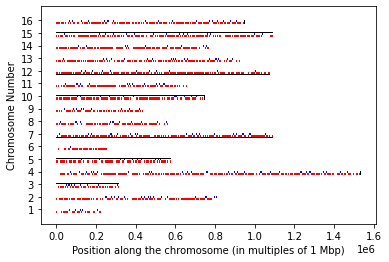

In [42]:
#Define the edges and staring/ending points of the chromosomes along with their sizes
yticks = []
yranges = []
yranges2 = []
yranges3 = []
yranges4 = []
yrange1, yrange2, yrange3, yranges5, yranges6 = [], [], [], [], []
listreg = []

for i in range(1,17):
   yranges.append([(i*30)-10.5, 10])
   yranges2.append([(i*30)-10.5, 0.5])
   yranges3.append([(i*30)-5.5,0.5])
   yranges4.append([(i*30)-12.5, 21])
   yranges5.append([(i*30)-0.5,0.5])
   yranges6.append([(i*30)+4.5,0.5])
   yrange1.append([(i*30)-10,5])
   yrange2.append([(i*30)-5,5])
   yrange3.append([(i*30),5])
   yticks.append((i*30)-1.5)
   listreg.append([])

for i in range(0,16):
    listreg[i] = allgenesYESindirect[i] + allgenesNO[i]


fig = pyplot.figure()
ax = fig.add_subplot(111)

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y.
#This chunk plots the edges and ends of the chromosome, essentially everything in black as well
for i in range(0,16):
    coll = BrokenBarHCollection([(-1000,1000),(chrom[i], 1000)], yranges[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
    #col2 = BrokenBarHCollection(telom[i], yranges[i], facecolor="purple", zorder= 0.5)
    #ax.add_collection(col2)
    col3 = BrokenBarHCollection(centrom[i], yranges4[i], facecolor="brown", zorder= 0.5)
    ax.add_collection(col3)
    col4 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges2[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col4)
    #col5 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges3[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(col5)
    #col6 = BrokenBarHCollection(allgenesYESdirect[i], yrange3[i], facecolor="blue", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(col6)
    col7 = BrokenBarHCollection(listreg[i], yrange1[i], facecolor="red", zorder= 0.2)
    ax.add_collection(col7)
    col8 = BrokenBarHCollection(allgenesYESdirect[i], yrange2[i], facecolor="blue", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col8)
    col9 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges5[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col9)
    #col10 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges6[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(col10)

#Sets the labels
yticklabels = []
for a in range(1,17):
    yticklabels.append(a)

#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels) 
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 1 Mbp)")
ax.axis('tight')
pyplot.savefig("../SCerevisiae.pdf")

